<a href="https://colab.research.google.com/github/yelynn99/study-2020-2/blob/master/0917_RF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
# print shape of the data
X, y = mnist['data'], mnist['target']

print("X shape = ", X.shape)
print("y shape = ", y.shape)

X shape =  (70000, 784)
y shape =  (70000,)


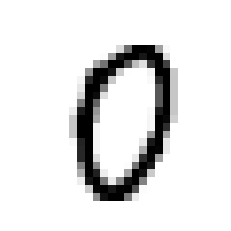

Answer =  0


In [2]:
# Show examples of datasets
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

sample = X[1000]
sample = sample.reshape(28, 28) # 28 * 28 = 784

# Plot Data
plt.imshow(sample, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

# Print Answer
print("Answer = ", y[1000])

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

# Shuffle Training Set for Accuracy
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [6]:
# using randomforest classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# make prediction using cross_validation score
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9667, 0.9676, 0.9631])

In [8]:
# to improve accuracy we have to tune training-test set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

clf.fit(X_train_scale, y_train)
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9666 , 0.9656 , 0.96255])

In [9]:
# test score (KNN takes too long to train)

X_test_scale = scaler.fit_transform(X_test)
prediction = clf.predict(X_test_scale)
result = (prediction == y_test).mean()

print(result)

0.9585


['3' '4' '5' '4' '7' '6' '9' '6' '9' '1']


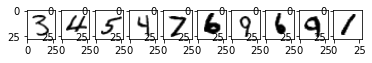

In [10]:
fig = plt.figure()
random_pick = np.random.randint(low=0, high=70000, size=10)
print(y[random_pick])

for i in range(10):
    idx = random_pick[i]
    img = np.reshape(X[idx], (28, 28))
    plot = fig.add_subplot(1, 10, i+1)
    plot.imshow(img, cmap='binary')